**Please submit all parts of the Module 1 homework in 1 notebook.**

# Module 1, Part 2

# Section 1: Sampling

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA
import matplotlib as mpl
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/Module 1/cmpe_188_diabetes.csv"    
df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,0,1,NaN,NaN,NaN,502.01,68.0,131.0,39.3,30.0
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,0,1,NaN,NaN,NaN,203.01,61.0,95.0,35.1,9.0
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,0,0,NaN,NaN,NaN,703.03,88.0,148.0,36.7,NaN
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,0,0,NaN,NaN,NaN,1206.03,NaN,NaN,34.8,NaN
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,0,0,NaN,NaN,NaN,601.01,99.0,130.0,36.7,NaN


## Reducing dataset size

Note that **diabetes_mellitus** is the target variable for this dataset.

### 1. Apply random sampling without replacement to the diabetes data to create a sample that contains 10% of the original data

Hint: Use the pandas [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) function.

In [ ]:
sample = df['diabetes_mellitus'].sample(frac=0.10)
sample

10908     0
64479     0
73764     0
100204    0
32005     1
         ..
117766    0
76884     0
101326    0
81963     0
38290     0
Name: diabetes_mellitus, Length: 13016, dtype: int64

### 2. Are the properties of the sample comparable to that of the entire dataset?  

Explore several attribute values, e.g., mean age, mean BMI.

In [ ]:
df['age'].describe()

count    125169.000000
mean         61.995103
std          16.822880
min           0.000000
25%          52.000000
50%          64.000000
75%          75.000000
max          89.000000
Name: age, dtype: float64

In [ ]:
df['diabetes_mellitus'].describe()

count    130157.000000
mean          0.216285
std           0.411712
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diabetes_mellitus, dtype: float64

In [ ]:
df['bmi'].describe()

count    125667.000000
mean         29.110260
std           8.262776
min          14.844926
25%          23.598006
50%          27.564749
75%          32.803127
max          67.814990
Name: bmi, dtype: float64

### 3. Apply stratified sampling to the (original) dataset based on the target variable (so that the fraction of samples belonging to class 0 and 1 match those of the original dataset) to create a sample that contains 10% of the original data

Hint: Use [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) operation on the target variable and create a sample dataset with the same target distribution


In [ ]:
stratified_dataframe = df.groupby('diabetes_mellitus', group_keys=False).apply(lambda x: x.sample(frac=0.10))
stratified_dataframe

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
23668,23669,172494,55,76.0,23.733832,0,Caucasian,F,157.4,Emergency Department,...,0,0,NaN,NaN,NaN,501.02,59.0,121.0,36.4,3.0
118303,118304,166386,1,73.0,39.641459,1,Caucasian,M,178.0,Operating Room,...,0,0,NaN,NaN,1269.2160,1206.03,68.0,106.0,NaN,13.0
124584,124585,274904,122,34.0,34.118411,0,Caucasian,M,165.1,NaN,...,0,0,NaN,NaN,653.0112,501.06,NaN,NaN,36.2,32.0
80047,80048,226754,181,64.0,25.857629,1,Caucasian,M,182.9,Operating Room,...,0,0,NaN,NaN,NaN,1401.01,91.0,141.0,36.7,11.0
53946,53947,158220,194,45.0,42.093664,1,Caucasian,F,165.0,Recovery Room,...,0,0,NaN,NaN,NaN,1202.07,72.0,132.0,36.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20139,20140,228346,44,86.0,34.375000,0,Caucasian,F,160.0,Emergency Department,...,0,1,NaN,NaN,1411.6896,107.01,72.0,129.0,NaN,20.0
127007,127008,179013,7,80.0,27.588221,0,Caucasian,F,165.1,Direct Admit,...,0,1,NaN,NaN,1570.4064,106.01,81.0,133.0,36.6,NaN
121525,121526,225716,175,72.0,39.599454,0,African American,F,169.0,Acute Care/Floor,...,0,1,NaN,NaN,1588.8960,211.09,56.0,125.0,35.8,33.0
24633,24634,240860,147,62.0,32.109695,0,Caucasian,F,168.9,Emergency Department,...,0,1,NaN,NaN,1509.6672,109.10,77.0,152.0,36.6,34.0


## Class balancing



### 4. Visualize the data to understand if there is a class imbalance (between the categories of the target variable), e.g., using a bar chart.  Use the data sample you generated using stratified sampling.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


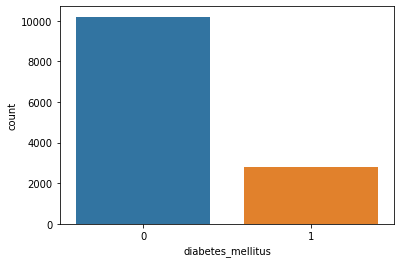

0    10201
1     2815
Name: diabetes_mellitus, dtype: int64

In [ ]:
g = sns.countplot(stratified_dataframe['diabetes_mellitus'])
g.set_xticklabels([0,1])
plt.show()
stratified_dataframe['diabetes_mellitus'].value_counts()



###5. Use the [resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) method to upsample the minority class (so both classes are represented by the same number of samples) if there exists a class imbalance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


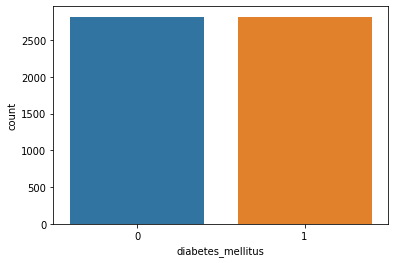

In [ ]:
from sklearn.utils import resample

df_majority = stratified_dataframe[stratified_dataframe['diabetes_mellitus']==0]
df_minority = stratified_dataframe[stratified_dataframe['diabetes_mellitus']==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=2815)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=2815)
# Combine minority class with downsampled majority class
df_up_down_sampled = pd.concat([df_majority_downsampled, df_minority_upsampled])

df_up_down_sampled['diabetes_mellitus'].value_counts()


g = sns.countplot(df_up_down_sampled['diabetes_mellitus'])
g.set_xticklabels([0,1])
plt.show()



# Section 2: Normalization

### 1. Normalize the dataset (except the target variable)

Implement your own normalization using either the standardization or min-max scaling formulas we discussed in class. Use sklearn.standardScaler() or sklearn.MinMaxScaler() to compare their output to that of your implementation.

In [ ]:
df.head()


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,...,solid_tumor_with_metastasis,diabetes_mellitus,bilirubin_max,albumin_min,urineoutput,apache_diagnosis,diasbp_noninvasive_max,sysbp_noninvasive_max,temperature_apache,bun_min
0,1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,...,0,1,NaN,NaN,NaN,502.01,68.0,131.0,39.3,30.0
1,2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,...,0,1,NaN,NaN,NaN,203.01,61.0,95.0,35.1,9.0
2,3,276985,118,25.0,31.952749,0,Caucasian,F,172.7,Emergency Department,...,0,0,NaN,NaN,NaN,703.03,88.0,148.0,36.7,NaN
3,4,262220,118,81.0,22.635548,1,Caucasian,F,165.1,Operating Room,...,0,0,NaN,NaN,NaN,1206.03,NaN,NaN,34.8,NaN
4,5,201746,33,19.0,NaN,0,Caucasian,M,188.0,NaN,...,0,0,NaN,NaN,NaN,601.01,99.0,130.0,36.7,NaN


In [ ]:

new = df.loc[:, df.columns!='diabetes_mellitus']

numeric = pd.get_dummies(new, drop_first=True)

df_norm = (numeric-numeric.min())/ (numeric.max() - numeric.min())

#view normalized DataFrame
df_norm


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0.000000,0.513833,0.576355,0.764045,0.148912,0.0,0.738140,0.009718,0.004501,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000008,0.750455,0.394089,0.865169,0.237435,0.0,0.390478,0.007775,0.006697,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000015,0.984735,0.576355,0.280899,0.322972,0.0,0.607981,0.010690,0.001425,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000023,0.872879,0.576355,0.910112,0.147076,1.0,0.477822,0.009718,0.001425,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000031,0.414742,0.157635,0.213483,NaN,0.0,0.870012,0.008746,0.001840,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,0.999969,0.134530,0.029557,0.561798,0.272651,0.0,0.652509,0.998056,0.001556,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130153,0.999977,0.383735,0.029557,0.887640,0.279564,0.0,0.435006,0.995141,0.001477,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130154,0.999985,0.550902,0.029557,0.820225,0.328873,0.0,0.695325,0.993197,0.002235,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130155,0.999992,0.572439,0.832512,0.910112,0.180548,0.0,0.825484,0.997085,0.002491,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
numeric

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,1,214826,118,68.0,22.732803,0,180.3,92,0.541667,0,...,0,0,0,0,1,0,0,0,0,0
1,2,246060,81,77.0,27.421875,0,160.0,90,0.927778,0,...,0,0,0,0,0,0,0,1,0,0
2,3,276985,118,25.0,31.952749,0,172.7,93,0.000694,0,...,0,0,0,0,0,0,0,1,0,0
3,4,262220,118,81.0,22.635548,1,165.1,92,0.000694,0,...,0,0,0,0,1,0,0,0,0,0
4,5,201746,33,19.0,NaN,0,188.0,91,0.073611,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,130153,164758,7,50.0,29.287256,0,175.3,1109,0.023611,0,...,0,0,0,0,0,1,0,0,0,0
130153,130154,197653,7,79.0,29.653433,0,162.6,1106,0.009722,0,...,0,0,0,0,0,0,1,0,0,0
130154,130155,219719,7,73.0,32.265371,0,177.8,1104,0.143056,0,...,0,0,0,0,0,1,0,0,0,0
130155,130156,222562,170,81.0,24.408579,0,185.4,1108,0.188194,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(numeric)
normalized_dataset = scaler.transform(numeric)
df_normalized = pd.DataFrame(normalized_dataset)
df_normalized

,0,1,2,3,4,5,6,7,8,9,...,205,206,207,208,209,210,211,212,213,214
0,0.000000,0.513833,0.576355,0.764045,0.148912,0.0,0.738140,0.009718,0.004501,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000008,0.750455,0.394089,0.865169,0.237435,0.0,0.390478,0.007775,0.006697,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000015,0.984735,0.576355,0.280899,0.322972,0.0,0.607981,0.010690,0.001425,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000023,0.872879,0.576355,0.910112,0.147076,1.0,0.477822,0.009718,0.001425,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000031,0.414742,0.157635,0.213483,NaN,0.0,0.870012,0.008746,0.001840,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,0.999969,0.134530,0.029557,0.561798,0.272651,0.0,0.652509,0.998056,0.001556,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130153,0.999977,0.383735,0.029557,0.887640,0.279564,0.0,0.435006,0.995141,0.001477,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130154,0.999985,0.550902,0.029557,0.820225,0.328873,0.0,0.695325,0.993197,0.002235,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130155,0.999992,0.572439,0.832512,0.910112,0.180548,0.0,0.825484,0.997085,0.002491,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
new_normalized = pd.DataFrame(data=df_norm.values, columns=df_norm.columns)
new_normalized


,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0.000000,0.513833,0.576355,0.764045,0.148912,0.0,0.738140,0.009718,0.004501,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000008,0.750455,0.394089,0.865169,0.237435,0.0,0.390478,0.007775,0.006697,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000015,0.984735,0.576355,0.280899,0.322972,0.0,0.607981,0.010690,0.001425,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000023,0.872879,0.576355,0.910112,0.147076,1.0,0.477822,0.009718,0.001425,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000031,0.414742,0.157635,0.213483,NaN,0.0,0.870012,0.008746,0.001840,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,0.999969,0.134530,0.029557,0.561798,0.272651,0.0,0.652509,0.998056,0.001556,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130153,0.999977,0.383735,0.029557,0.887640,0.279564,0.0,0.435006,0.995141,0.001477,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130154,0.999985,0.550902,0.029557,0.820225,0.328873,0.0,0.695325,0.993197,0.002235,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130155,0.999992,0.572439,0.832512,0.910112,0.180548,0.0,0.825484,0.997085,0.002491,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Section 3: Correlation Analysis for Dimensionality Reduction


Note that categorical features should be encoded as numerical features before computing the covariance matrix.

### 1. Compute the pairwise covariance matrix for your data 

Use the standardized version of your data (Note: This makes the covariance matrix equivalent to the correlation matrix which is a normalized version of the covariance matrix).

Hint: The [Covariance](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.cov.html) function could be used for this purpose.

In [ ]:
conv_matrix = new_normalized.cov()
conv_matrix

,Unnamed: 0,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
Unnamed: 0,0.083335,-0.000155,-0.000018,-0.002058,-0.000177,-0.001908,0.000473,0.084494,-0.000037,NaN,...,-0.000255,-0.000882,0.001424,-0.007537,-0.005995,0.004949,0.002876,-0.004539,0.000506,0.005884
encounter_id,-0.000155,0.083354,-0.000132,-0.000075,0.000164,0.000183,0.000075,-0.000128,-0.000004,NaN,...,0.000046,-0.000084,0.000170,-0.000119,0.000062,0.000318,-0.000358,0.000205,-0.000125,0.000195
hospital_id,-0.000018,-0.000132,0.097794,-0.001168,0.000237,0.003473,0.001315,0.000501,-0.000023,NaN,...,-0.000061,-0.000062,-0.000231,0.005442,-0.000910,-0.004215,0.003234,-0.009668,0.001281,0.000722
age,-0.002058,-0.000075,-0.001168,0.035729,-0.002460,0.004334,-0.003950,-0.002002,0.000132,NaN,...,0.000053,0.000100,-0.000165,0.001775,0.000941,0.000307,0.000118,-0.002508,-0.001800,-0.000691
bmi,-0.000177,0.000164,0.000237,-0.002460,0.024333,0.000727,-0.001638,-0.000327,0.000001,NaN,...,0.000085,0.000045,0.000049,0.000116,-0.000123,-0.000035,0.000246,-0.000458,-0.000588,-0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icu_type_Cardiac ICU,0.004949,0.000318,-0.004215,0.000307,-0.000035,-0.007062,0.000288,0.004676,-0.000020,NaN,...,-0.000041,-0.000131,-0.001977,-0.002433,-0.002187,0.059542,-0.005346,-0.034914,-0.005146,-0.004034
icu_type_MICU,0.002876,-0.000358,0.003234,0.000118,0.000246,-0.011368,-0.000381,0.002055,0.000053,NaN,...,0.000262,-0.000174,0.003283,-0.003218,-0.002892,-0.005346,0.077014,-0.046170,-0.006805,-0.005335
icu_type_Med-Surg ICU,-0.004539,0.000205,-0.009668,-0.002508,-0.000458,-0.026218,-0.003333,-0.002961,-0.000201,NaN,...,-0.000476,0.000325,0.002280,-0.021013,-0.018887,-0.034914,-0.046170,0.247592,-0.044436,-0.034838
icu_type_Neuro ICU,0.000506,-0.000125,0.001281,-0.001800,-0.000588,0.003507,0.000194,-0.000293,-0.000112,NaN,...,0.000372,0.000117,-0.000788,-0.003097,-0.002784,-0.005146,-0.006805,-0.044436,0.074377,-0.005134


### 2. Visualize the covariance matrix as a heatmap

Hint: Feel free to use the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function.

In [ ]:
#Resource = https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
# displaying dataframe as an heatmap 
# with diverging colourmap as virdis
conv_matrix.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

Output hidden; open in https://colab.research.google.com to view.

### 3. Create a pairplot of the data

Hint: Try using [pandas scatterplot](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html) or [seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) 


In [ ]:
import seaborn
import pandas
 
# pairplot
seaborn.pairplot(conv_matrix)

### 4. Print the covariance of all the features with respect to the target variable 

In [ ]:
#https://datascience.stackexchange.com/questions/39137/how-can-i-check-the-correlation-between-features-and-target-variable
conv = df.cov()
a = conv["diabetes_mellitus"].sort_values(ascending=False)
a

d1_glucose_max           14.517769
glucose_apache           13.623490
h1_glucose_max           13.444278
h1_glucose_min           12.133198
urineoutput_apache        8.653673
                           ...    
h1_pao2fio2ratio_max     -1.854936
h1_pao2fio2ratio_min     -2.049442
icu_id                   -2.118614
encounter_id            -31.491663
Unnamed: 0             -303.215618
Name: diabetes_mellitus, Length: 183, dtype: float64

### 5. Drop the features whose covariance with respect to the target variable is less than **0**




# Section 4: Principal Component Analysis

### 1. Perform PCA on the sampled dataset (use the data sample you generated using stratified sampling) 

Note that before applying PCA, you need to
1.   Standardize the dataset
2.   Drop or fill the null values in the dataset
3.   Convert all categorical variables to numerical variables 

Hint: The [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function in the scikit-learn library and its attributes (e.g., explained_variance_ratio_) will help you perform this task

In [ ]:
numeric = pd.get_dummies(stratified_dataframe, drop_first=True)

df_norm = (numeric-numeric.min())/ (numeric.max() - numeric.min())
df_norm = df_norm.fillna(0)
print(df_norm.isna().sum())


#view normalized DataFrame
#df_norm



Unnamed: 0               0
encounter_id             0
hospital_id              0
age                      0
bmi                      0
                        ..
icu_type_Cardiac ICU     0
icu_type_MICU            0
icu_type_Med-Surg ICU    0
icu_type_Neuro ICU       0
icu_type_SICU            0
Length: 215, dtype: int64


In [ ]:
pca = PCA(n_components='mle')
X_pca = pca.fit_transform(df_norm)
X_pca.shape

(13016, 203)

### 2. Perform PCA on the dataset and find how many principal components are required to identify a minimum of 70% of the variation in the dataset.





In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.70)
X_pca = pca.fit_transform(df_norm)
X_pca.shape


(13016, 24)

### 3. Visualize the dataset after using PCA to reduce the dataset to 2 dimensions

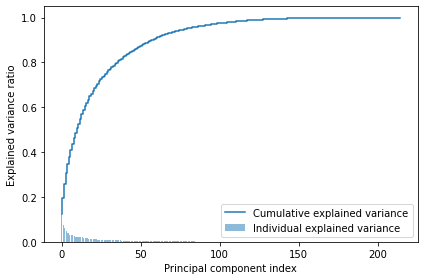

In [ ]:
# https://plotly.com/python/pca-visualization/

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)
X_pca.shape
#mpl.rcParams.update(mpl.rcParamsDefault)

n_components = 2

pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(df_norm)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
